<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started</a></span></li><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variable description</a></span></li><li><span><a href="#Starting-our-Data-Cleaning" data-toc-modified-id="Starting-our-Data-Cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Starting our Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Checking-Data-Types" data-toc-modified-id="Checking-Data-Types-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Checking Data Types</a></span></li></ul></li><li><span><a href="#Normalizing-the-data" data-toc-modified-id="Normalizing-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normalizing the data</a></span></li></ul></li><li><span><a href="#Transforming-categorical-variables" data-toc-modified-id="Transforming-categorical-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Transforming categorical variables</a></span></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the Data</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Comments-on-P-Values" data-toc-modified-id="Comments-on-P-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comments on P-Values</a></span><ul class="toc-item"><li><span><a href="#Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model" data-toc-modified-id="Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Interpret a Correlation Heatmap to Build a Baseline Model</a></span></li><li><span><a href="#Building-a-Baseline-Model" data-toc-modified-id="Building-a-Baseline-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Building a Baseline Model</a></span></li></ul></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model 4</a></span></li><li><span><a href="#Model-5" data-toc-modified-id="Model-5-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model 5</a></span><ul class="toc-item"><li><span><a href="#Investigating-Multicollinearity" data-toc-modified-id="Investigating-Multicollinearity-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Investigating Multicollinearity</a></span></li></ul></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Getting Started
You'll find the resulting dataset from your work in the Obtaining Data Lab stored within the file 'KC_house_data.csv'.

In the cells below:

Import pandas and set the standard alias.
Import numpy and set the standard alias.
Import matplotlib.pyplot and set the standard alias.
Import seaborn and set the alias sns (this is the standard alias for seaborn).
Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook.
Load the dataset stored in the 'Lego_data_merged.csv' file into a DataFrame, df.
Inspect the head of the DataFrame to ensure everything loaded correctly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Variable description
Here are some brief explanations of the variables used in this project :



* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
 


We will conduct data cleaning, exploration and feature engineering on the training set as well as build our prediction model using this subset.

In [3]:
#The prediction target for this analysis is the sale price of the home, so we separate the data into X and y accordingly:
y = data["price"]
X = data.drop("price", axis=1)

In [4]:
# Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [6]:
# Set df as our training set, including features and target
df = pd.concat([X_train, y_train], axis = 1)

In [7]:
#profile = ProfileReport(train_data)
#profile

In [8]:
# The dataset contains a mix of continuous and categorical data

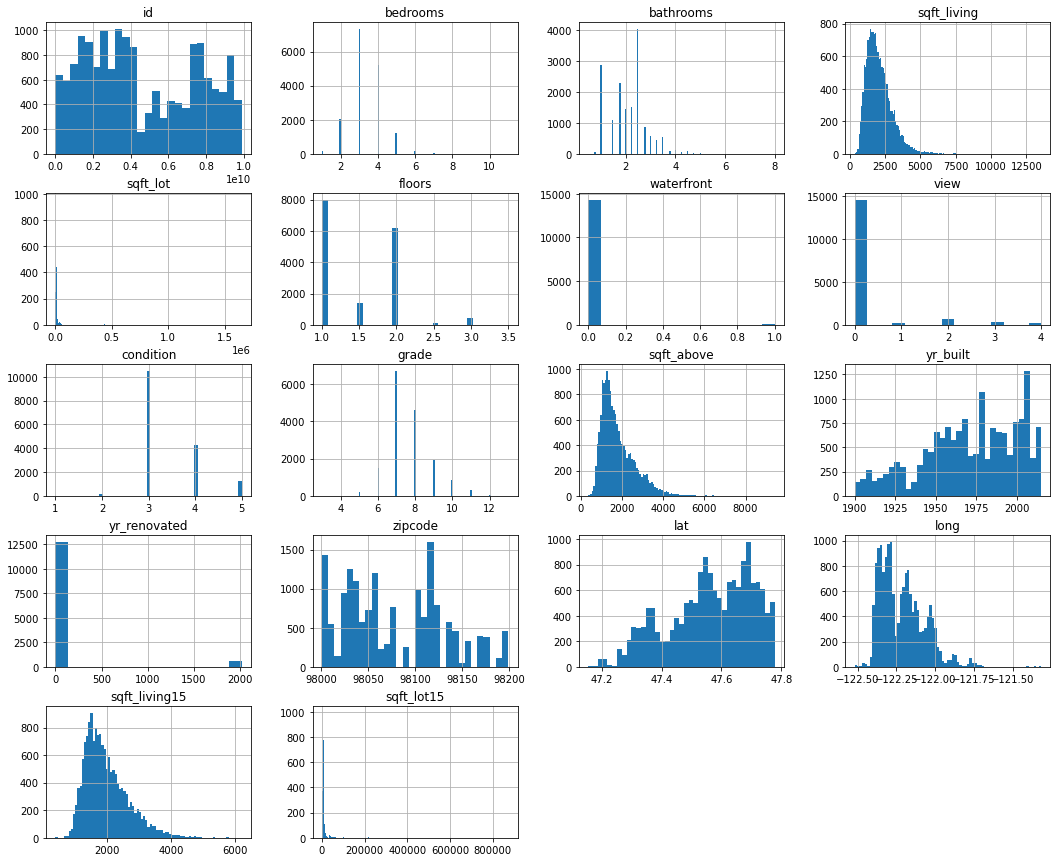

In [9]:
# Clearly we have categorical and continuous data
X_train.hist(figsize=(18,15), bins='auto');

In [10]:

# price, sqft_above, sqft_basement, sqft_living, sqft_lot are all continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values
# We can see that there is an increase in the number of houses built as time goes on. Most houses sold were built in the 2000s

In [11]:
# Declare relevant columns
relevant_columns = [
    'bedrooms',  # Linear feet of street connected to property
    'bathrooms',      # Lot size in square feet
    'sqft_living',       # Type of road access to property
    'sqft_lot',  # Rates the overall material and finish of the house
    'floors',  # Rates the overall condition of the house
    'waterfront',    # Original construction date
    'view', # Remodel date (same as construction date if no remodeling or additions)
    'condition',    # Above grade (ground) living area square feet
    'grade',     # Full bathrooms above grade
    'sqft_above', # Bedrooms above grade (does NOT include basement bedrooms)
    'sqft_basement', # Total rooms above grade (does not include bathrooms)
    'yr_built',   # Number of fireplaces
    'yr_renovated',  # Fireplace quality
    'zipcode',       # Month Sold (MM)
    'lat',        # Year Sold (YYYY)
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]


# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3,2.50,1880,4499,2.0,0.0,0.0,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,3,2.50,2020,6564,1.0,0.0,0.0,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,5,4.00,4720,493534,2.0,0.0,0.0,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,2,2.00,1430,3880,1.0,0.0,0.0,4,7,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
13083,3,2.25,2270,32112,1.0,0.0,0.0,4,8,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
21575,4,2.75,2770,3852,2.0,0.0,0.0,3,8,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
5390,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
860,1,0.75,380,15000,1.0,0.0,0.0,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


### Starting our Data Cleaning
To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

#### Checking Data Types
In the cell below, use the appropriate method to check the data type of each column.

In [12]:
#checking data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     14441 non-null  float64
 6   view           16148 non-null  float64
 7   condition      16197 non-null  int64  
 8   grade          16197 non-null  int64  
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  object 
 11  yr_built       16197 non-null  int64  
 12  yr_renovated   13318 non-null  float64
 13  zipcode        16197 non-null  int64  
 14  lat            16197 non-null  float64
 15  long           16197 non-null  float64
 16  sqft_living15  16197 non-null  int64  
 17  sqft_lot15     16197 non-null  int64  
dtypes: 

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From description we can infer that

- Average price of house sold in King County is 540,088
- Max price of home sale is 770,0000
- Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
- Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

In [14]:
X_train.shape

(16197, 18)

In [15]:
X_train.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1756
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
# waterfront value is null. Using logic, it probably means that the property is not 
# waterfront and will be treated accordingly
X_train.waterfront.unique()

array([ 0., nan,  1.])

In [17]:
# fill nan with 0 (not waterfront property)
X_train.waterfront.fillna(0,inplace=True)
X_train.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# 0 denotes property has not been renovated
X_train.yr_renovated.value_counts()

0.0       12771
2014.0       49
2005.0       24
2013.0       23
2003.0       23
          ...  
1950.0        1
1954.0        1
1971.0        1
1978.0        1
1940.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [19]:
# Let's fill in the missing values to reflect the fact that
# the houses haven't been renovated

X_train.yr_renovated.fillna(0,inplace=True)
X_train.isna().sum()

bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             49
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [20]:
#checking out the view column
X_train.view.unique()

array([ 0.,  3.,  2.,  4.,  1., nan])

In [21]:
# This looks like how many times the property was viewed before being sold

In [22]:
# Let's assume missing values mean the home wasn't viewed
X_train.view.fillna(0,inplace=True)

In [23]:
# Numerical Data Stored as Strings
# we need to change the data type of sqft_basement because it's a string when
# it needs to be converted to a float
X_train.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

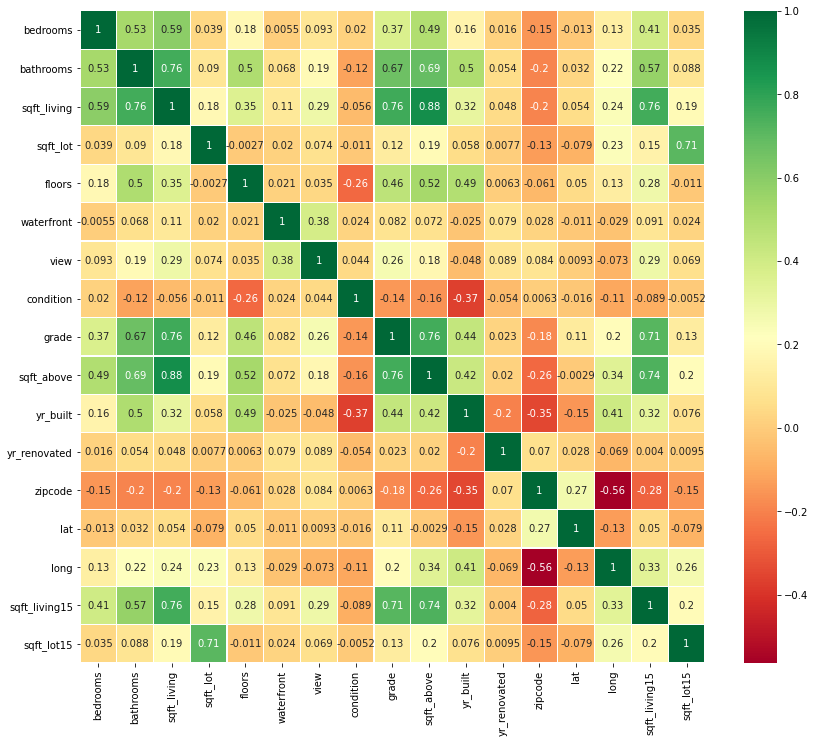

In [24]:
# first let's look for multicollinary
sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

**What does the heatmap tell us**<br>

In the heatmap above the darker greens indicate a high positive correlation, and the dark reds show a negative correlation. We will use 0.75 and -0.75 as the thresholds in determining significant correlation.
* **‘sqft_living’** — strong correlations
    - It’s easy to see that sqft_living has strong positive correlations with sqft_above, sqft_basement, bedrooms, sqft_living15, and grade.
* **‘grade’ and ‘sqft_above’**
    - With a positive correlation of 0.76, the relationship between grade and sqft_above can be considered strong.

In [25]:
# checking out the values to see if there are any symbols
# is the basement square footage really not know? Or is it a function of sqft_living?

X_train.sqft_basement.unique()

array(['0.0', '710.0', '760.0', '530.0', '600.0', '880.0', '960.0',
       '560.0', '1120.0', '300.0', '?', '650.0', '1040.0', '1020.0',
       '380.0', '610.0', '508.0', '110.0', '310.0', '1090.0', '510.0',
       '680.0', '230.0', '730.0', '580.0', '210.0', '1060.0', '540.0',
       '640.0', '800.0', '140.0', '1150.0', '1800.0', '910.0', '500.0',
       '740.0', '1400.0', '240.0', '550.0', '810.0', '1030.0', '420.0',
       '720.0', '1110.0', '440.0', '120.0', '220.0', '840.0', '750.0',
       '1852.0', '870.0', '330.0', '850.0', '1000.0', '770.0', '400.0',
       '370.0', '790.0', '630.0', '1660.0', '360.0', '820.0', '1870.0',
       '350.0', '940.0', '1320.0', '1010.0', '570.0', '780.0', '250.0',
       '950.0', '1300.0', '620.0', '480.0', '1200.0', '460.0', '2500.0',
       '1160.0', '920.0', '1390.0', '890.0', '980.0', '900.0', '1230.0',
       '320.0', '1580.0', '1190.0', '1050.0', '260.0', '430.0', '1500.0',
       '1270.0', '990.0', '2060.0', '1100.0', '290.0', '1080.0', '190.

In [26]:
# we can see that sqft_living = sqft_above + sqft_basement
X_train.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
6405,1880,1880,0.0
937,2020,1310,710.0
19076,4720,3960,760.0
15201,1430,1430,0.0
13083,2270,1740,530.0
...,...,...,...
11964,2230,2230,0.0
21575,2770,2770,0.0
5390,1530,1530,0.0
860,380,380,0.0


In [27]:
# make a copy to drop "?" values to perform boolean comparison
test_df = X_train.copy()
test_df = test_df[test_df.sqft_basement != '?']
# needed a separate line of code for '0.0' as .astype(float) would error
test_df.sqft_basement[test_df.sqft_basement == '0.0'] = 0
# now I can convert datatype of the whole set to float
test_df.sqft_basement = test_df.sqft_basement.astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 6405 to 15795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15857 non-null  int64  
 1   bathrooms      15857 non-null  float64
 2   sqft_living    15857 non-null  int64  
 3   sqft_lot       15857 non-null  int64  
 4   floors         15857 non-null  float64
 5   waterfront     15857 non-null  float64
 6   view           15857 non-null  float64
 7   condition      15857 non-null  int64  
 8   grade          15857 non-null  int64  
 9   sqft_above     15857 non-null  int64  
 10  sqft_basement  15857 non-null  float64
 11  yr_built       15857 non-null  int64  
 12  yr_renovated   15857 non-null  float64
 13  zipcode        15857 non-null  int64  
 14  lat            15857 non-null  float64
 15  long           15857 non-null  float64
 16  sqft_living15  15857 non-null  int64  
 17  sqft_lot15     15857 non-null  int64  
dtypes: 

Now let's see if this relationship between the 3 variables is consistent throughout the entire dataset

In [28]:
(test_df.sqft_basement != test_df.sqft_living - test_df.sqft_above).sum()

0


Thus we can conclude that any row with a value of '?' in the sqft_basement column can be replaced by adding the data from sqft_living and sqft_above.

In [29]:
difference = (X_train.loc[X_train["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(X_train.loc[X_train["sqft_basement"] == '?', ["sqft_above"]]).values
X_train.loc[X_train["sqft_basement"] == '?', ["sqft_basement"]] = difference

In [30]:
#change the dtype to int64 to be consistent with the rest of the 'sqft' variables
X_train.sqft_basement = X_train.sqft_basement.astype(float)
X_train.sqft_basement = X_train.sqft_basement.astype('int64')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16197 non-null  int64  
 1   bathrooms      16197 non-null  float64
 2   sqft_living    16197 non-null  int64  
 3   sqft_lot       16197 non-null  int64  
 4   floors         16197 non-null  float64
 5   waterfront     16197 non-null  float64
 6   view           16197 non-null  float64
 7   condition      16197 non-null  int64  
 8   grade          16197 non-null  int64  
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  int64  
 11  yr_built       16197 non-null  int64  
 12  yr_renovated   16197 non-null  float64
 13  zipcode        16197 non-null  int64  
 14  lat            16197 non-null  float64
 15  long           16197 non-null  float64
 16  sqft_living15  16197 non-null  int64  
 17  sqft_lot15     16197 non-null  int64  
dtypes: 

### Normalizing the data

We saw earlier in the visualizations that many continuous variables are skewed. 
- In order to improve the performance of our model later on, it’s generally a good idea to transform these variables to resemble normal distributions. 

One way of doing this is by log-transforming the variable:

In [ ]:
log_vars = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", 
            "log_sqft_living15", "log_sqft_lot15"]
# log-transforming chosen variables
X_train[log_vars] = np.log(X_train[["sqft_above", "sqft_living", "sqft_lot",
                          "sqft_living15", "sqft_lot15"]])
# dropping un-transformed variables
X_train.drop(["sqft_above", "sqft_living", "sqft_lot", "sqft_living15",  
         "sqft_lot15"], axis = 1, inplace = True)
X_train[log_vars].hist(bins = "auto", figsize = (20,20));

In [40]:
# Now, you'll need to convert all of our numeric columns to the same scale by 
# normalizing our dataset. Recall that you normalize a dataset by converting each 
# numeric value to it's corresponding z-score for the column, which is obtained by 
# subtracting the column's mean and then dividing by the column's standard deviation for every value.

def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
             'sqft_living15', 'sqft_lot15']:
    X_train[feat] = norm_feat(X_train[feat])
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-3.210609e-16,2.646282e-15,-1.173362e-16,3.926195e-17,-6.188352e-16,-2.348926e-16,-4.175383e-16,5.849785e-16,-3.184332e-17,-2.858645e-17,2.324222e-16,2.795121e-15,2.840336e-15,-8.076481e-14,-2.673566e-13,8.282436e-12,-1.653010e-16,7.434549e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.703841e+00,-2.228490e+00,-2.128103e+00,-8.928560e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-3.694660e+00,-4.361315e+00,-1.912855e+00,-6.765498e-01,-2.376306e+00,-1.849200e-01,-1.469569e+00,-2.751763e+00,-2.170376e+00,-2.436981e+00,-1.101632e+00
25%,-3.804431e-01,-7.925178e-01,-7.637483e-01,-4.503591e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-6.417620e-01,-5.316560e-01,-7.578699e-01,-6.765498e-01,-6.437795e-01,-1.849200e-01,-8.771345e-01,-6.380938e-01,-8.345872e-01,-7.525919e-01,-5.109279e-01
50%,-3.804431e-01,2.844610e-01,-1.411788e-01,-2.182458e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-6.417620e-01,-5.316560e-01,-2.525639e-01,-6.765498e-01,6.961370e-02,-1.849200e-01,-1.180776e-01,9.479352e-02,-2.216960e-01,-2.022471e-01,-1.796498e-01
75%,7.812560e-01,6.434540e-01,6.270985e-01,3.643680e-02,9.636276e-01,-7.276368e-02,-2.822125e-01,8.846871e-01,4.257588e-01,5.848004e-01,6.446364e-01,8.509491e-01,-1.849200e-01,6.965200e-01,8.482089e-01,6.583529e-01,5.982545e-01,1.153630e-01
max,3.104654e+00,3.156405e+00,3.534631e+00,1.174813e+01,3.737092e+00,1.374220e+01,5.359780e+00,2.411136e+00,4.255418e+00,3.255704e+00,4.728303e+00,1.530371e+00,5.458909e+00,2.196120e+00,1.550484e+00,3.337788e+00,3.183207e+00,6.325571e+00


In [34]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:

# Define function to remove outliers
def remove_outliers(X_train):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        X_train = X_train[np.abs(X_train[variable]-X_train[variable].mean()) <= (3*X_train[variable].std())]
        
    return X_train

In [42]:
# Apply function to df
X_train = remove_outliers(X_train)

In [43]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,-0.380443,0.643454,-0.127933,-0.499844,0.963628,-0.072764,-0.282212,-0.641762,0.425759,0.267179,-0.676550,0.783007,-0.18492,-0.951189,0.029248,1.789844,0.348098,-0.495444
937,-0.380443,0.643454,0.057514,-0.295880,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-0.555748,1.028982,0.816978,-0.18492,-0.710512,-1.497031,0.540489,-0.352341,-0.490418
15201,-1.542142,-0.074532,-0.724010,-0.560983,-0.885349,-0.072764,-0.282212,0.884687,-0.531656,-0.382500,-0.676550,-0.711722,-0.18492,0.678006,0.879181,-1.298184,-0.819300,-0.663052
16852,-2.703841,-0.792518,-1.230013,-0.470113,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-0.934005,-0.676550,-0.949519,-0.18492,-0.469836,-0.622608,0.116180,-1.619802,-0.538093
2134,0.781256,0.284461,1.408622,-0.450359,0.963628,-0.072764,3.949282,0.884687,1.383174,0.555926,1.629521,-1.493057,-0.18492,0.455843,0.678222,-0.402420,1.582204,-0.510928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.380443,-0.792518,-0.988933,-0.641976,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-1.133240,0.092140,-1.459086,-0.18492,0.418816,0.753852,-0.834587,-1.102811,-0.580470
21575,0.781256,1.002447,1.050976,-0.563749,0.963628,-0.072764,-0.282212,-0.641762,0.425759,1.552101,-0.676550,1.496400,-0.18492,1.807335,-0.448299,-0.040972,-0.185570,-0.423864
5390,0.781256,-0.792518,-0.591548,-0.055273,-0.885349,-0.072764,-0.282212,0.884687,-1.489071,-0.238127,-0.676550,0.205498,-0.18492,-1.228893,0.625642,2.504884,-0.669206,-0.035539
860,-2.703841,-1.869497,-2.114857,0.537357,-0.885349,-0.072764,-0.282212,-0.641762,-2.446486,-1.898418,-0.676550,-0.236126,-0.18492,1.622199,-0.585873,-0.756011,-1.252905,0.847326


## Transforming categorical variables

In [ ]:
#Categorical Data Encoded as Integers
#It's also common to see categorical data encoded as integers. Given that a big step in the data cleaning process is to convert all categorical columns to numeric equivalents, this may not seem like a problem at first glance. However, leaving categorical data encoded as integers can have a negative effect by introducing bad information into our model. This is because integer encoding mistakenly adds mathematical relationships between the different categories -- our model may mistakenly think that the category represented by the integer 4 twice as much as category 2, and so on.

#The best way of dealing with this problem is to cast the entire column to a string data type, which will better represent the column's categorical nature. Since it's categorical, we can correctly deal with it when we one-hot encode categorical data later in the process.

#The following example shows the syntax necessary for converting a column from one data type to another:

#df['some_column'] = df.['some_column'].astype('float32')

#df['some_column'] = df.['some_column'].astype('str')
#Once done, it is then common to pass these categorical variables to another function such as pd.get_dummies() in order to transform these features into representations that are more suitable for machine learning algorithms. It may be necessary to drop the first dummy to avoid the dummy variable trap.

## Exploring the Data

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

array([0.69498202, 0.7128128 , 0.68973782])

Not terrible, we are explaining between 71% and 69% of the variance in the target with our current feature set. Let's say that this is our final model and move on to preparing the test data.

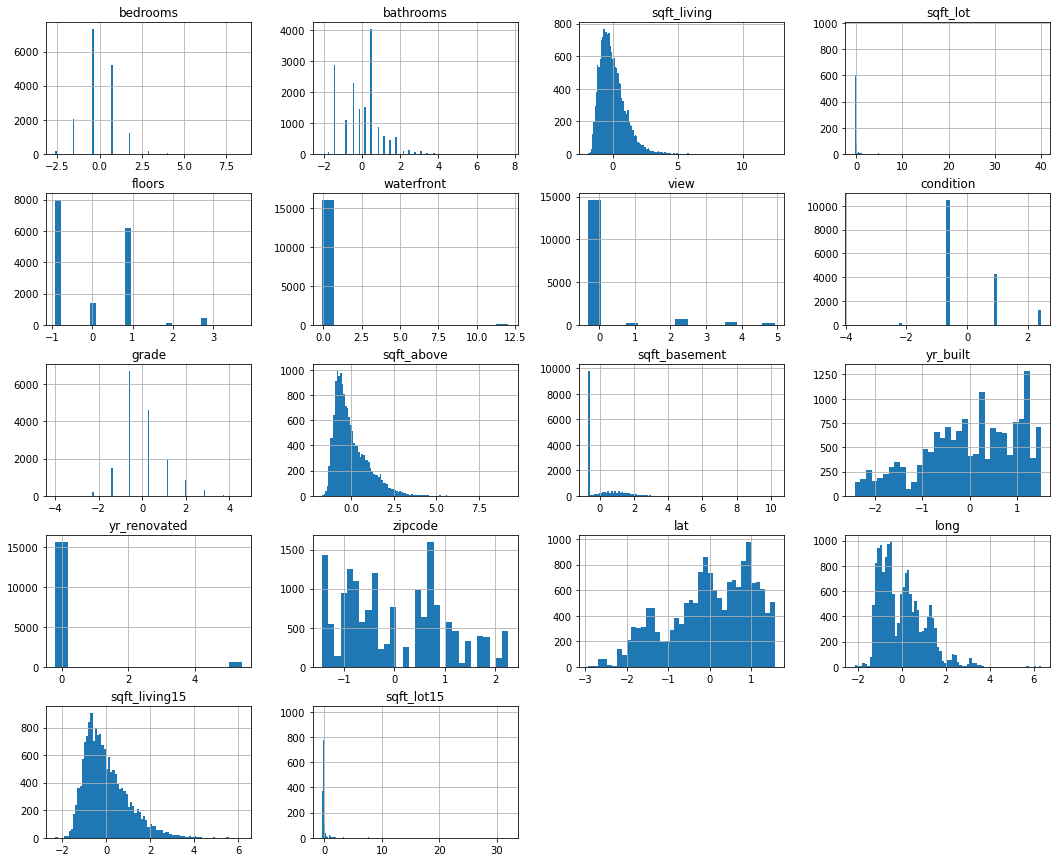

In [45]:
X_train.hist(figsize=(18,15), bins='auto');

In [73]:
df = pd.concat([X_train, y_train], axis = 1)

In [74]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6405,-0.410871,0.499414,-0.221837,-0.259293,0.934823,-0.083066,-0.30255,-0.630607,0.291888,0.108183,-0.661685,0.749523,-0.186943,-0.917991,0.039234,1.515967,0.207520,-0.285840,529000.0
937,-0.410871,0.499414,-0.069367,-0.208650,-0.915404,-0.083066,-0.30255,-0.630607,-0.563342,-0.580557,0.940485,0.783623,-0.186943,-0.674939,-1.493247,0.393395,-0.405449,-0.284462,253000.0
19076,1.796753,2.452414,2.871138,11.733958,0.934823,-0.083066,-0.30255,2.442643,1.147117,2.621479,1.053314,0.135721,-0.186943,-0.955384,-0.776547,1.445365,0.251304,7.705251,745000.0
15201,-1.514684,-0.151586,-0.711921,-0.274474,-0.915404,-0.083066,-0.30255,0.906018,-0.563342,-0.435559,-0.661685,-0.750883,-0.186943,0.727285,0.892621,-1.258693,-0.814095,-0.331828,545000.0
13083,-0.410871,0.173914,0.202902,0.417897,-0.915404,-0.083066,-0.30255,0.906018,0.291888,-0.060981,0.534301,0.306221,-0.186943,-0.674939,-1.561229,0.845248,0.470222,1.074108,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.410871,0.499414,0.159339,-0.227387,0.934823,-0.083066,-0.30255,-0.630607,-0.563342,0.531093,-0.661685,1.124624,-0.186943,-0.244923,-0.218229,2.589118,0.353466,-0.249542,440000.0
21575,0.692941,0.824914,0.747440,-0.275160,0.934823,-0.083066,-0.30255,-0.630607,0.291888,1.183584,-0.661685,1.465626,-0.186943,1.867761,-0.440254,-0.129060,-0.259504,-0.266201,572000.0
5390,0.692941,-0.802586,-0.603014,-0.148909,-0.915404,-0.083066,-0.30255,0.906018,-1.418571,-0.314727,-0.661685,0.169821,-0.186943,-1.198436,0.638051,2.158446,-0.682745,-0.159654,299800.0
860,-2.618496,-1.779086,-1.855451,-0.001763,-0.915404,-0.083066,-0.30255,-0.630607,-2.273800,-1.704290,-0.661685,-0.273481,-0.186943,1.680798,-0.578387,-0.771539,-1.193553,0.082581,245000.0


## Model 3

In [53]:
import statsmodels.api as sm

In [54]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2257.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:01:02   Log-Likelihood:            -2.2064e+05
No. Observations:               16197   AIC:                         4.413e+05
Df Residuals:                   16179   BIC:                         4.415e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.413e+05   1568.533    345.090      0.000    5.38e+05    5.44e+05
bedrooms      -3.311e+04   2049.191    -16.160      0.000   -3.71e+04   -2.91e+04
bathrooms      3.218e+04   2893.574     11.120      0.000    2.65e+04    3.78e+04
sqft_living    7.793e+04   1850.944     42.104      0.000    7.43e+04    8.16e+04
sqft_lot       3719.4829   2246.629      1.656      0.098    -684.159    8123.124
floors         6240.7089   2232.697      2.795      0.005    1864.377    1.06e+04
waterfront     5.165e+04   1704.345     30.304      0.000    4.83e+04     5.5e+04
view           3.949e+04   1862.791     21.199      0.000    3.58e+04    4.31e+04
condition      1.871e+04   1750.075     10.689      0.000    1.53e+04    2.21e+04
grade          1.177e+05   2894.582     40.651      0.000    1.12e+05    1.23e+05
sqft_above     7.132e+04   1967.392     36.251      0.000    6.75e+04    7.52e+04
sqft_basement  2.828e+04   1798.710     15.725      0.000    2.48e+04    3.18e+04
yr_built      -7.964e+04   2417.104    -32.947      0.000   -8.44e+04   -7.49e+04
yr_renovated   7132.1351   1658.977      4.299      0.000    3880.356    1.04e+04
zipcode       -3.011e+04   2022.502    -14.886      0.000   -3.41e+04   -2.61e+04
lat            8.062e+04   1707.718     47.211      0.000    7.73e+04     8.4e+04
long          -2.952e+04   2119.902    -13.927      0.000   -3.37e+04   -2.54e+04
sqft_living15  1.903e+04   2724.789      6.983      0.000    1.37e+04    2.44e+04
sqft_lot15    -1.155e+04   2269.554     -5.088      0.000    -1.6e+04   -7098.069
==============================================================================
Omnibus:                    13350.738   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096930.634
Skew:                           3.451   Prob(JB):                         0.00
Kurtosis:                      42.721   Cond. No.                     8.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

P values show that all are relevant, right?

Assessing the Model
When performing an initial assessment of the model you might focus on a number of different perspectives. There are metrics assessing the overall accuracy of the model including  𝑟2  and mean square error. There are also many metrics when analyzing how various features contribute to the overall model. These are essential to building a story and intuition behind the model so that educated business strategies can be implemented to optimize the target variable. After all, typically you aren't solely interested in predicting a quantity in a black box given said information. Rather, you would often like to know the underlying influencers and how those can be adjusted in order to increase or decrease the final measured quantity whether it be sales, customer base, costs, or risk. Such metrics would include p-values associated with the various features, comparing models with features removed and investigating potential multicollinearity in the model. Multicollinearity also touches upon checking model assumptions. One underlying intuition motivating the regression model is that the features constitute a set of levers which, if appropriately adjusted, account for the target variable. The theory then goes that the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed.

## Comments on P-Values

Based on the p-values above, you can see that there are a number of extraneous features. Recall that a common significance cutoff is 0.05. The refined model should eliminate these irrelevant features.

### Interpret a Correlation Heatmap to Build a Baseline Model

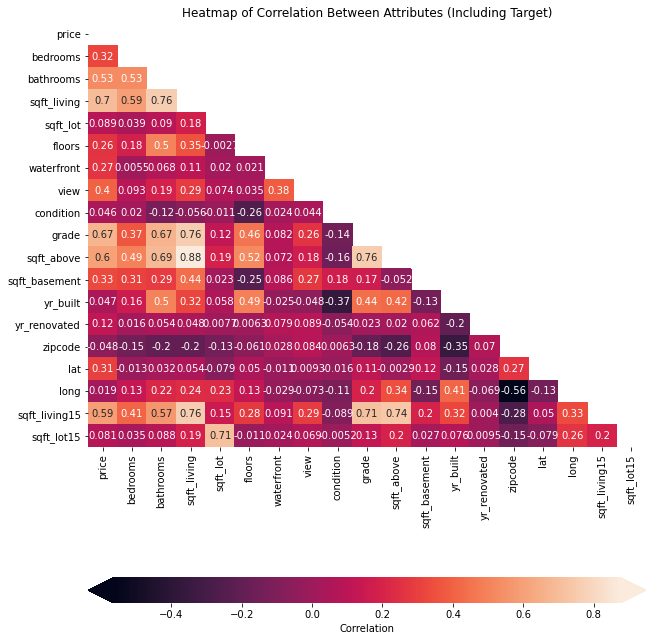

In [37]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [38]:
most_correlated_feature = "sqft_living"

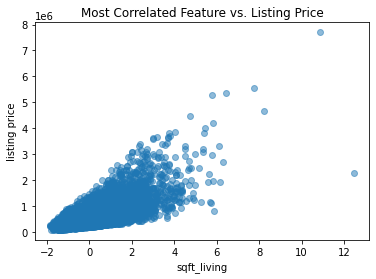

In [39]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

array([0.69498202, 0.7128128 , 0.68973782])

In [46]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

In [47]:
# Drop multicollinear features
df = drop_corrfeats(df)

In [48]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,8,0.0,1993,0.0,98029,47.5664,-121.999,529000.0
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,7,710.0,1994,0.0,98042,47.3545,-122.158,253000.0
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,0.0,0.0,5,9,760.0,1975,0.0,98027,47.4536,-122.009,745000.0
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,7,0.0,1949,0.0,98117,47.6844,-122.392,545000.0
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,8,530.0,1980,0.0,98042,47.3451,-122.094,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,0.0,2004,0.0,98065,47.5308,-121.847,440000.0
21575,4140940150,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,8,0.0,2014,NaN,98178,47.5001,-122.232,572000.0
5390,8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,0.0,1976,0.0,98014,47.6492,-121.908,299800.0
860,1723049033,6/20/2014,1,0.75,380,15000,1.0,0.0,0.0,3,5,0.0,1963,0.0,98168,47.4810,-122.323,245000.0


In [51]:
df = df.drop(['id', 'date'], axis = 1)

In [52]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
6405,3,2.50,1880,4499,2.0,0.0,0.0,3,8,0.0,1993,0.0,98029,47.5664,-121.999,529000.0
937,3,2.50,2020,6564,1.0,0.0,0.0,3,7,710.0,1994,0.0,98042,47.3545,-122.158,253000.0
19076,5,4.00,4720,493534,2.0,0.0,0.0,5,9,760.0,1975,0.0,98027,47.4536,-122.009,745000.0
15201,2,2.00,1430,3880,1.0,0.0,0.0,4,7,0.0,1949,0.0,98117,47.6844,-122.392,545000.0
13083,3,2.25,2270,32112,1.0,0.0,0.0,4,8,530.0,1980,0.0,98042,47.3451,-122.094,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,0.0,3,7,0.0,2004,0.0,98065,47.5308,-121.847,440000.0
21575,4,2.75,2770,3852,2.0,0.0,0.0,3,8,0.0,2014,NaN,98178,47.5001,-122.232,572000.0
5390,4,1.50,1530,9000,1.0,0.0,0.0,4,6,0.0,1976,0.0,98014,47.6492,-121.908,299800.0
860,1,0.75,380,15000,1.0,0.0,0.0,3,5,0.0,1963,0.0,98168,47.4810,-122.323,245000.0


In [53]:
# Save a csv copy
df.to_csv('house_date_cleaned.csv')

### Building a Baseline Model

In [41]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [42]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [68]:
"""
Because we are using the .score method of LinearRegression, these
are r-squared scores. That means that each of them represents the
amount of variance of the target (listing price) that is explained
by the model's features (currently just the number of pieces) and
parameters (intercept value and coefficient values for the features)

In general this seems like a fairly strong model already. It is
getting nearly identical performance on training subsets compared to
the validation subsets, explaining around 80% of the variance both
times
"""

"\nBecause we are using the .score method of LinearRegression, these\nare r-squared scores. That means that each of them represents the\namount of variance of the target (listing price) that is explained\nby the model's features (currently just the number of pieces) and\nparameters (intercept value and coefficient values for the features)\n\nIn general this seems like a fairly strong model already. It is\ngetting nearly identical performance on training subsets compared to\nthe validation subsets, explaining around 80% of the variance both\ntimes\n"

## Model 4

In [43]:
X_train_second_model = X_train

In [44]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7055840452096551
Validation score: 0.6954756727963045

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [47]:
"""
Our second model got slightly better scores on the training
data, but worse scores on the validation data. This means that
it is a worse model overall, since what we care about is the
ability to generate prices for future LEGO sets, not the
ability to fit well to the known LEGO sets' features

It seems like adding in these other features is actually just
causing overfitting, rather than improving the model's ability
to understand the underlying patterns in the data
"""

"\nOur second model got slightly better scores on the training\ndata, but worse scores on the validation data. This means that\nit is a worse model overall, since what we care about is the\nability to generate prices for future LEGO sets, not the\nability to fit well to the known LEGO sets' features\n\nIt seems like adding in these other features is actually just\ncausing overfitting, rather than improving the model's ability\nto understand the underlying patterns in the data\n"

## Model 5

### Investigating Multicollinearity

In [74]:
"""
This potentially indicates that our model is performing poorly because these features violate the independence assumption (i.e. there is strong multicollinearity). In other words, maybe the minimum age, maximum age, and difficulty level are not really providing different information than the number of pieces in the LEGO set, and instead are just adding noise. Then the model is using that noise to get a slightly better score on the training data, but but a worse score on the validation data.

While LinearRegression from scikit-learn has a lot of nice functionality for working with a predictive framing (e.g. compatibility with the cross_validate function), it doesn't have anything built in to detect strong multicollinearity. Fortunately the same linear regression model is also available from StatsModels (documentation here), where it is called OLS (for "ordinary least squares"). Models in StatsModels, including OLS, are not really designed for predictive model validation, but they do give us a lot more statistical information.

In the cell below, we use StatsModels to fit and evaluate a linear regression model on the same features used in the second model. Note that we will only see one r-squared value (not train and validation r-squared values) because it is using the full X_train dataset instead of using cross-validation.
"""

'\nThis potentially indicates that our model is performing poorly because these features violate the independence assumption (i.e. there is strong multicollinearity). In other words, maybe the minimum age, maximum age, and difficulty level are not really providing different information than the number of pieces in the LEGO set, and instead are just adding noise. Then the model is using that noise to get a slightly better score on the training data, but but a worse score on the validation data.\n\nWhile LinearRegression from scikit-learn has a lot of nice functionality for working with a predictive framing (e.g. compatibility with the cross_validate function), it doesn\'t have anything built in to detect strong multicollinearity. Fortunately the same linear regression model is also available from StatsModels (documentation here), where it is called OLS (for "ordinary least squares"). Models in StatsModels, including OLS, are not really designed for predictive model validation, but they 

In [48]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2257.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:24:30   Log-Likelihood:            -2.2064e+05
No. Observations:               16197   AIC:                         4.413e+05
Df Residuals:                   16179   BIC:                         4.415e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.404e+06   3.18e+06      2.329      0.020    1.17e+06    1.36e+07
bedrooms      -3.311e+04   2049.191    -16.160      0.000   -3.71e+04   -2.91e+04
bathrooms      3.218e+04   2893.574     11.120      0.000    2.65e+04    3.78e+04
sqft_living   -1.234e+06    5.6e+05     -2.203      0.028   -2.33e+06   -1.36e+05
sqft_lot       3719.4829   2246.629      1.656      0.098    -684.159    8123.124
floors         6240.7089   2232.697      2.795      0.005    1864.377    1.06e+04
waterfront     5.165e+04   1704.345     30.304      0.000    4.83e+04     5.5e+04
view           3.949e+04   1862.791     21.199      0.000    3.58e+04    4.31e+04
condition      1.871e+04   1750.075     10.689      0.000    1.53e+04    2.21e+04
grade          1.177e+05   2894.582     40.651      0.000    1.12e+05    1.23e+05
sqft_above     1.254e+06   5.05e+05      2.484      0.013    2.64e+05    2.24e+06
sqft_basement  1492.7896    610.672      2.445      0.015     295.805    2689.775
yr_built      -2715.5886     82.424    -32.947      0.000   -2877.148   -2554.029
yr_renovated     19.7762      4.600      4.299      0.000      10.760      28.793
zipcode        -562.8732     37.813    -14.886      0.000    -636.992    -488.755
lat            5.831e+05   1.24e+04     47.211      0.000    5.59e+05    6.07e+05
long          -2.084e+05    1.5e+04    -13.927      0.000   -2.38e+05   -1.79e+05
sqft_living15    27.7682      3.977      6.983      0.000      19.973      35.563
sqft_lot15       -0.4303      0.085     -5.088      0.000      -0.596      -0.265
==============================================================================
Omnibus:                    13350.738   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096930.634
Skew:                           3.451   Prob(JB):                         0.00
Kurtosis:                      42.721   Cond. No.                     3.15e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
significant_features = ["bathrooms", "sqft_living", "waterfront"]

In [81]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5304319172343133
Validation score: 0.5214686037588835

Second Model
Train score:      0.7055899540849243
Validation score: 0.6954979590279299

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [82]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
yr_renovated: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


In [87]:
significant_features_2 = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront",
                        "view", "condition", "grade", "sqft_above", "sqft_basement",
                       "yr_built", "yr_renovated", "zipcode", "lat", "long",
                       "sqft_living15", "sqft_lot15"]

In [88]:
fourth_model = LinearRegression()
X_train_fourth_model = X_train[significant_features_2]

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7055146467156383
Validation score: 0.6955507686537469

Second Model
Train score:      0.7055899540849243
Validation score: 0.6954979590279299

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642
